<a href="https://colab.research.google.com/github/moridin04/Data-Science-Project/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science - Course Project**

**Analyzing Factors Influencing Writing Productivity Through Machine Learning Models**

## **PHASE 1: Data Preparation**

### **Importing**

**Importing Libraries**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

### **Dataset**

**Dataset**

In [28]:
url = "https://raw.githubusercontent.com/moridin04/Data-Science-Project/refs/heads/main/datascience-dataset-official.csv"

df = pd.read_csv(url)

In [29]:
df

,Week,Day,Date,Hours of Sleep,Hours of Reading Time,Book Titles,Authors,Genres,"Mood Impact (Happy, Neutral, Sad)",Did I write today?,Hours of Writing,Mode of Writing,Type of Day
0,1,1,12/14/25,7.6,2.0,Memories of Ice,Steven Erikson,Fantasy,Sad,Yes,2,Desktop,School
1,1,2,12/15/25,7.2,4.3,Memories of Ice,Steven Erikson,Fantasy,Happy,Yes,2,Phone,School
2,1,3,12/16/25,6.8,4.2,Memories of Ice,Steven Erikson,Fantasy,Neutral,No,0,NaN,School
3,1,4,12/17/25,8.1,0.0,NaN,NaN,NaN,Neutral,Yes,2,Phone,School
4,1,5,12/18/25,7.8,2.2,Memories of Ice,Steven Erikson,Fantasy,Happy,Yes,2,Desktop,School
5,1,6,12/19/25,7.1,1.0,11/23/66,Stephen King,Fiction,Happy,Yes,2,Desktop,School
6,1,7,12/20/25,8.9,0.0,NaN,NaN,NaN,Happy,Yes,2,Phone,School
7,2,8,12/21/25,7.8,0.0,NaN,NaN,NaN,Happy,Yes,2,Phone,School
8,2,9,12/22/25,7.7,1.0,House of Chains,Steven Eriskon,Fantasy,Happy,Yes,2,Phone,Vacation
9,2,10,12/23/25,6.8,1.0,On Writing,Stephen King,Memoir,Neutral,Yes,4,Phone,Vacation


**Columns**

In [30]:
df.columns

Index(['Week ', 'Day', 'Date', 'Hours of Sleep', 'Hours of Reading Time',
       'Book Titles', 'Authors', 'Genres', 'Mood Impact (Happy, Neutral, Sad)',
       'Did I write today?', 'Hours of Writing', 'Mode of Writing',
       'Type of Day'],
      dtype='object')

**Shape of Dataset**

In [31]:
df.shape

(56, 13)

**Numerical Features**

In [32]:
df.select_dtypes(include=['number']).columns

Index(['Week ', 'Day', 'Hours of Sleep', 'Hours of Reading Time',
       'Hours of Writing'],
      dtype='object')

**Categorical Features**

In [33]:
df.select_dtypes(include=['object']).columns

Index(['Date', 'Book Titles', 'Authors', 'Genres',
       'Mood Impact (Happy, Neutral, Sad)', 'Did I write today?',
       'Mode of Writing', 'Type of Day'],
      dtype='object')

**Describing the Dataset**

In [34]:
df.describe()

,Week,Day,Hours of Sleep,Hours of Reading Time,Hours of Writing
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,4.500000,28.500000,7.225000,1.196429,2.785714
std,2.312024,16.309506,0.998772,1.423563,1.744751
min,1.000000,1.000000,5.200000,0.000000,0.000000
25%,2.750000,14.750000,6.475000,0.000000,2.000000
50%,4.500000,28.500000,7.150000,1.000000,3.000000
75%,6.250000,42.250000,8.025000,2.000000,4.000000
max,8.000000,56.000000,9.100000,6.000000,7.000000


**Dataset Information**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Week                               56 non-null     int64  
 1   Day                                56 non-null     int64  
 2   Date                               56 non-null     object 
 3   Hours of Sleep                     56 non-null     float64
 4   Hours of Reading Time              56 non-null     float64
 5   Book Titles                        34 non-null     object 
 6   Authors                            34 non-null     object 
 7   Genres                             34 non-null     object 
 8   Mood Impact (Happy, Neutral, Sad)  56 non-null     object 
 9   Did I write today?                 56 non-null     object 
 10  Hours of Writing                   56 non-null     int64  
 11  Mode of Writing                    46 non-null     object 
 

## **PHASE 2: Exploratory Data Analysis (EDA)**

### **Cleaning**

**Structuring**

In [36]:
df.dtypes

,0
Week,int64
Day,int64
Date,object
Hours of Sleep,float64
Hours of Reading Time,float64
Book Titles,object
Authors,object
Genres,object
"Mood Impact (Happy, Neutral, Sad)",object
Did I write today?,object


**Indexing**

In [37]:
df.index

RangeIndex(start=0, stop=56, step=1)

**Duplication Check**

In [38]:
df.duplicated().sum()
df.shape

(56, 13)

**Conversion to Correct Data Types**

In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

/tmp/ipython-input-748457276.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,0
Week,int64
Day,int64
Date,datetime64[ns]
Hours of Sleep,float64
Hours of Reading Time,float64
Book Titles,object
Authors,object
Genres,object
"Mood Impact (Happy, Neutral, Sad)",object
Did I write today?,object


In [40]:
df.head(10)

,Week,Day,Date,Hours of Sleep,Hours of Reading Time,Book Titles,Authors,Genres,"Mood Impact (Happy, Neutral, Sad)",Did I write today?,Hours of Writing,Mode of Writing,Type of Day
0,1,1,2025-12-14,7.6,2.0,Memories of Ice,Steven Erikson,Fantasy,Sad,Yes,2,Desktop,School
1,1,2,2025-12-15,7.2,4.3,Memories of Ice,Steven Erikson,Fantasy,Happy,Yes,2,Phone,School
2,1,3,2025-12-16,6.8,4.2,Memories of Ice,Steven Erikson,Fantasy,Neutral,No,0,NaN,School
3,1,4,2025-12-17,8.1,0.0,NaN,NaN,NaN,Neutral,Yes,2,Phone,School
4,1,5,2025-12-18,7.8,2.2,Memories of Ice,Steven Erikson,Fantasy,Happy,Yes,2,Desktop,School
5,1,6,2025-12-19,7.1,1.0,11/23/66,Stephen King,Fiction,Happy,Yes,2,Desktop,School
6,1,7,2025-12-20,8.9,0.0,NaN,NaN,NaN,Happy,Yes,2,Phone,School
7,2,8,2025-12-21,7.8,0.0,NaN,NaN,NaN,Happy,Yes,2,Phone,School
8,2,9,2025-12-22,7.7,1.0,House of Chains,Steven Eriskon,Fantasy,Happy,Yes,2,Phone,Vacation
9,2,10,2025-12-23,6.8,1.0,On Writing,Stephen King,Memoir,Neutral,Yes,4,Phone,Vacation


**Transforming Data**

In [41]:
df['Did I write today?'] = df['Did I write today?'].map({'Yes': 1, 'No': 0})
df.head()

,Week,Day,Date,Hours of Sleep,Hours of Reading Time,Book Titles,Authors,Genres,"Mood Impact (Happy, Neutral, Sad)",Did I write today?,Hours of Writing,Mode of Writing,Type of Day
0,1,1,2025-12-14,7.6,2.0,Memories of Ice,Steven Erikson,Fantasy,Sad,1,2,Desktop,School
1,1,2,2025-12-15,7.2,4.3,Memories of Ice,Steven Erikson,Fantasy,Happy,1,2,Phone,School
2,1,3,2025-12-16,6.8,4.2,Memories of Ice,Steven Erikson,Fantasy,Neutral,0,0,NaN,School
3,1,4,2025-12-17,8.1,0.0,NaN,NaN,NaN,Neutral,1,2,Phone,School
4,1,5,2025-12-18,7.8,2.2,Memories of Ice,Steven Erikson,Fantasy,Happy,1,2,Desktop,School


**Filling Null Values**

In [42]:
df.fillna(0, inplace=True)
print(df.to_string())

    Week   Day       Date  Hours of Sleep  Hours of Reading Time                                      Book Titles                                     Authors                   Genres Mood Impact (Happy, Neutral, Sad)  Did I write today?  Hours of Writing Mode of Writing Type of Day
0       1    1 2025-12-14             7.6                    2.0                                  Memories of Ice                              Steven Erikson                  Fantasy                               Sad                   1                 2         Desktop      School
1       1    2 2025-12-15             7.2                    4.3                                  Memories of Ice                              Steven Erikson                  Fantasy                             Happy                   1                 2           Phone      School
2       1    3 2025-12-16             6.8                    4.2                                  Memories of Ice                              Steven E

**Splitting Genres**

In [43]:
df['Genres'].str.split(', ')

,Genres
0,[Fantasy]
1,[Fantasy]
2,[Fantasy]
3,NaN
4,[Fantasy]
5,[Fiction]
6,NaN
7,NaN
8,[Fantasy]
9,[Memoir]


In [44]:
split_genres = df['Genres'].str.split(', ', expand=True)

In [45]:
df = pd.concat([df, split_genres], axis=1)
df = df.drop(columns=['Genres'])
df = df.rename(columns={0: 'Genre 1', 1: 'Genre 2', 2: 'Genre 3'})
df.head(10)

,Week,Day,Date,Hours of Sleep,Hours of Reading Time,Book Titles,Authors,"Mood Impact (Happy, Neutral, Sad)",Did I write today?,Hours of Writing,Mode of Writing,Type of Day,Genre 1,Genre 2,Genre 3
0,1,1,2025-12-14,7.6,2.0,Memories of Ice,Steven Erikson,Sad,1,2,Desktop,School,Fantasy,None,None
1,1,2,2025-12-15,7.2,4.3,Memories of Ice,Steven Erikson,Happy,1,2,Phone,School,Fantasy,None,None
2,1,3,2025-12-16,6.8,4.2,Memories of Ice,Steven Erikson,Neutral,0,0,0,School,Fantasy,None,None
3,1,4,2025-12-17,8.1,0.0,0,0,Neutral,1,2,Phone,School,NaN,NaN,NaN
4,1,5,2025-12-18,7.8,2.2,Memories of Ice,Steven Erikson,Happy,1,2,Desktop,School,Fantasy,None,None
5,1,6,2025-12-19,7.1,1.0,11/23/66,Stephen King,Happy,1,2,Desktop,School,Fiction,None,None
6,1,7,2025-12-20,8.9,0.0,0,0,Happy,1,2,Phone,School,NaN,NaN,NaN
7,2,8,2025-12-21,7.8,0.0,0,0,Happy,1,2,Phone,School,NaN,NaN,NaN
8,2,9,2025-12-22,7.7,1.0,House of Chains,Steven Eriskon,Happy,1,2,Phone,Vacation,Fantasy,None,None
9,2,10,2025-12-23,6.8,1.0,On Writing,Stephen King,Neutral,1,4,Phone,Vacation,Memoir,None,None


In [46]:
df_clean = df.copy()
genre_cols = ['Genre 1', 'Genre 2', 'Genre 3']
combined_genres = pd.get_dummies(df_clean[genre_cols].stack()).groupby(level=0).max().add_prefix('Genre_')

**Dropping Columns**

In [47]:
cols_to_drop = ['Week ', 'Date', 'Book Titles', 'Did I write today?', 'Authors', 'Genre 1', 'Genre 2', 'Genre 3']
existing_drops = [c for c in cols_to_drop if c in df_clean.columns]
df_clean = df_clean.drop(columns=existing_drops)
df_final = pd.concat([df_clean, combined_genres], axis=1)

**Encoding Categoricals**

In [48]:
categorical_cols = ['Mood Impact (Happy, Neutral, Sad)', 'Type of Day', 'Mode of Writing']
existing_cats = [c for c in categorical_cols if c in df_final.columns]
df_encoded = pd.get_dummies(df_final, columns=existing_cats, drop_first=True)
df_encoded = df_encoded.fillna(0)

In [49]:
target_variable = 'Hours of Writing'
correlations = df_encoded.corr()[target_variable].sort_values(ascending=False)

**Feature Correlation with "Hours of Writing" (Writing Productivity)**

Feature Correlation with 'Hours of Writing': 
Hours of Writing                             1.000000
Mode of Writing_Phone                        0.407816
Mode of Writing_Desktop                      0.215732
Day                                          0.203823
Genre_Shonen                                 0.121214
Genre_Memoir                                 0.094693
Mood Impact (Happy, Neutral, Sad)_Neutral    0.090517
Genre_Fantasy                                0.069743
Type of Day_Vacation                         0.047700
Mood Impact (Happy, Neutral, Sad)_Sad        0.029485
Genre_Fiction                               -0.016380
Type of Day_School                          -0.023370
Hours of Reading Time                       -0.029595
Genre_Horror                                -0.033630
Type of Day_Weekend                         -0.126029
Hours of Sleep                              -0.298403
Name: Hours of Writing, dtype: float64


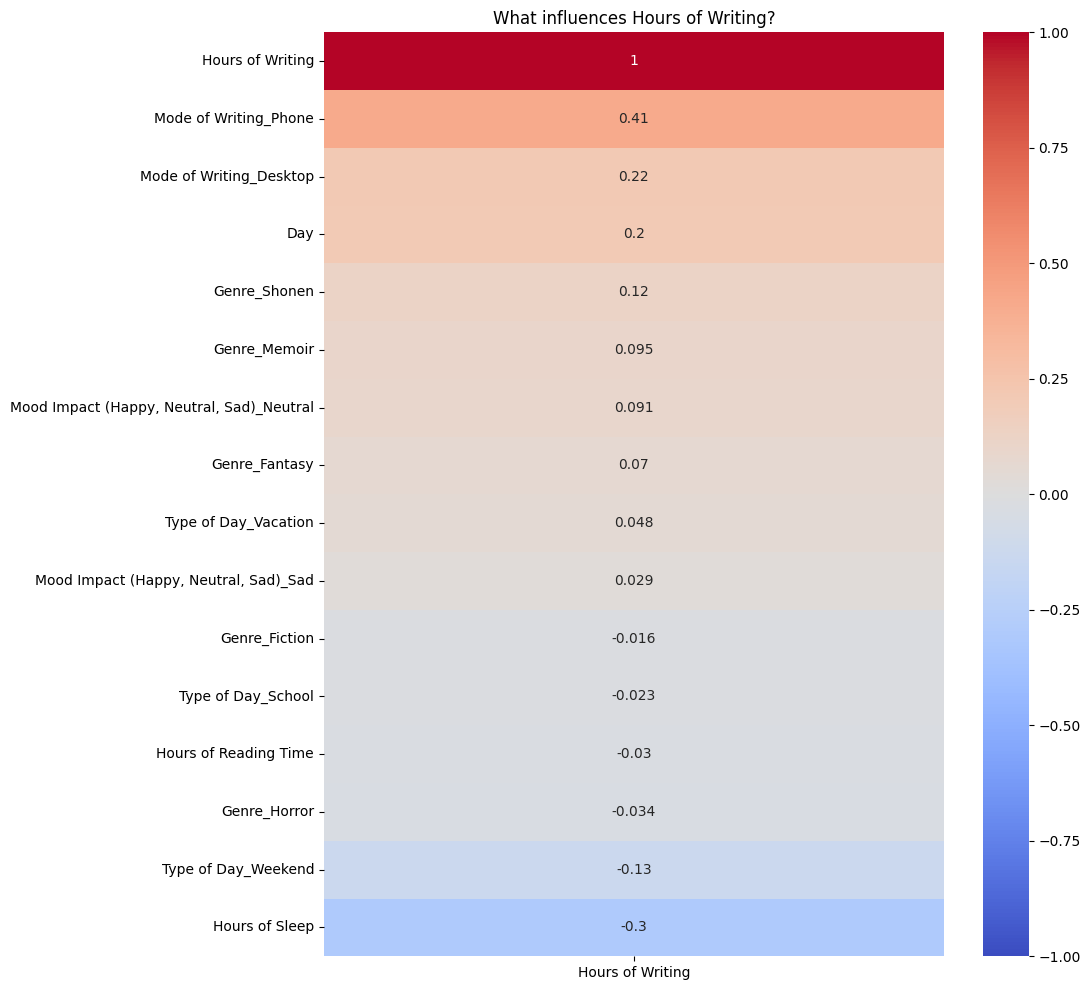

In [50]:
print("Feature Correlation with 'Hours of Writing': ")
print(correlations)
plt.figure(figsize=(10, 12))
heatmap_data = df_encoded.corr()[[target_variable]].sort_values(by=target_variable, ascending=False)
sns.heatmap(heatmap_data, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title(f"What influences {target_variable}?")
plt.show()

### Statistical Analysis

All "Features" to be tested:
- Day (Line Plot)
- Mode of Writing - (Chi-Squared)
- Genre - (ANOVA)
- Type of Day - (Chi-squared)
- Mood Impact (Happy, Neutral, Sad) - (ANOVA)
- Hours of Reading Time - (Regression)
- Hours of Sleep - (Regression)

Research Question: "How much do I write every day?"

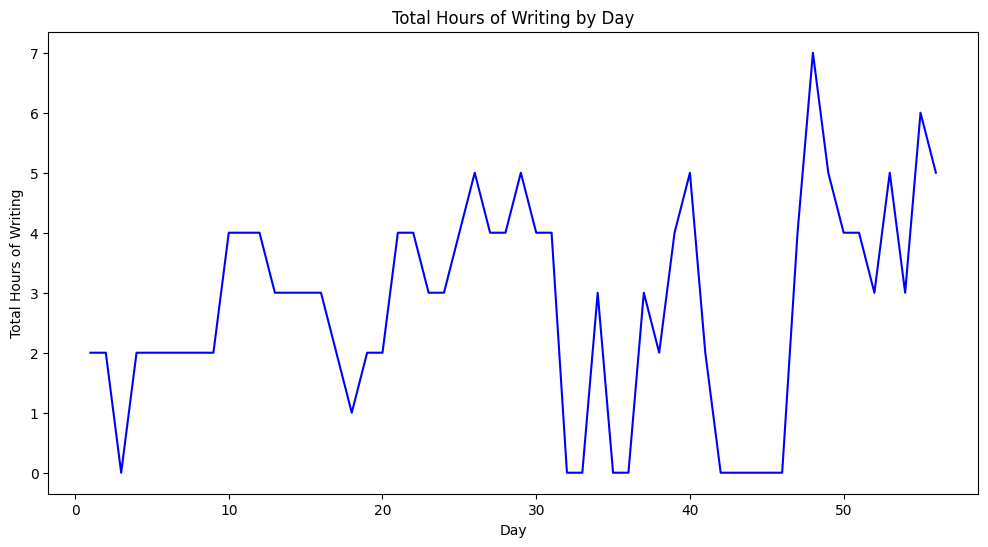

In [51]:
grouped = df_final.groupby(df['Day'])["Hours of Writing"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x="Day", y="Hours of Writing", color="blue")
plt.title("Total Hours of Writing by Day")
plt.xlabel("Day")
plt.ylabel("Total Hours of Writing")
plt.show()

## ANOVA

Research Question: "Which **Genres** boost my writing productivity the most?"

In [61]:
unique_genres = df[['Genre 1', 'Genre 2', 'Genre 3']].stack().unique()

In [63]:
print(f"{'GENRE':<15} | {'AVG (WITH)':<10} | {'AVG (WITHOUT)':<13} | {'P-VALUE':<10} | {'RESULT'}")
for genre in unique_genres:
    if genre == 0 or genre == '0': continue

    has_genre = df[['Genre 1', 'Genre 2', 'Genre 3']].apply(lambda x: genre in x.values, axis=1)

    with_genre = df[has_genre]['Hours of Writing']
    without_genre = df[~has_genre]['Hours of Writing']

    if len(with_genre) > 2:
        t_stat, p_val = ttest_ind(with_genre, without_genre, equal_var=False)
        sig = "SIGNIFICANT" if p_val < 0.05 else "-"
        print(f"{genre:<15} | {with_genre.mean():<10.2f} | {without_genre.mean():<13.2f} | {p_val:<10.4f} | {sig}")

GENRE           | AVG (WITH) | AVG (WITHOUT) | P-VALUE    | RESULT
Fantasy         | 2.92       | 2.68          | 0.6124     | -
Fiction         | 2.67       | 2.79          | 0.8724     | -
Horror          | 2.60       | 2.80          | 0.8201     | -
Shonen          | 3.67       | 2.74          | 0.4032     | -


## ANOVA

Research Question: "Is there a difference in my **writing productivity** using three types of **Mood Impact**?"

In [54]:
df['Mood Impact (Happy, Neutral, Sad)'].value_counts()

,count
"Mood Impact (Happy, Neutral, Sad)",
Happy,28
Neutral,25
Sad,3


In [55]:
df.groupby('Mood Impact (Happy, Neutral, Sad)').agg({'Hours of Writing': ['mean', 'median', 'min', 'max']})

Hours of Writing               
                                              mean median min max
Mood Impact (Happy, Neutral, Sad)                                
Happy                                     2.607143    2.5   0   6
Neutral                                   2.960000    4.0   0   5
Sad                                       3.000000    2.0   0   7

In [56]:
mood_happy = df[df['Mood Impact (Happy, Neutral, Sad)'] == 'Happy']['Hours of Writing']
mood_neutral = df[df['Mood Impact (Happy, Neutral, Sad)'] == 'Neutral']['Hours of Writing']
mood_sad = df[df['Mood Impact (Happy, Neutral, Sad)'] == 'Sad']['Hours of Writing']

f_statistic, p_value = stats.f_oneway(mood_happy, mood_neutral, mood_sad)

print(f"F-statistic:, {f_statistic:.4f}")
print(f"P-Value:, {p_value:.4f}")
alpha = 0.05

F-statistic:, 0.2864
P-Value:, 0.7521


In [57]:
if p_value < alpha:
  print("Significant different found (Reject null hypothesis)")
else:
  print("No significant difference found (Fail to reject null hypothesis)")

No significant difference found (Fail to reject null hypothesis)


## t-test

Research Question: "Is "Mode of Writing" associated with my writing productivity?"

In [58]:
phone_hours = df[df['Mode of Writing'] == 'Phone']['Hours of Writing']
desktop_hours = df[df['Mode of Writing'] == 'Desktop']['Hours of Writing']

In [59]:
t_stat, p_val = ttest_ind(phone_hours, desktop_hours, nan_policy='omit')

print(f"Phone avg: {phone_hours.mean():.2f} hrs | Desktop avg: {desktop_hours.mean():.2f} hrs")
print(f"p-value: {p_val:.4f}")
alpha = 0.05

Phone avg: 3.35 hrs | Desktop avg: 3.50 hrs
p-value: 0.7350


In [60]:
if p_value < alpha:
  print("Significant different found (Reject null hypothesis)")
else:
  print("No significant difference found (Fail to reject null hypothesis)")

No significant difference found (Fail to reject null hypothesis)


## **PHASE 3: Machine Learning**

Select Features (X) and Target (y)

Train-Test Split

Feature Scaling (fit on Train, transform on Test)

Linear Regression Model Training

Model Evaluation (Accuracy, Confusion Matrix)

Visualization of Results (Heatmap)

# **Final Conclusion**